In [22]:
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### 1.Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
data=pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Подготовьте датасет к обучению моделей:
### a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [4]:
le = preprocessing.LabelEncoder()
le.fit(data['HeartDisease'])

LabelEncoder()

In [5]:
list(le.classes_)

[0, 1]

In [6]:
y = le.transform(data['HeartDisease'])

In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
X = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']]

In [9]:
X = pd.get_dummies(data=data, columns=['Sex', 'ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'])
# удаляем два столбца
# если 'Sex_M' = 0, это женщина
# если 'ExerciseAngina_N' = 0 , то 'ExerciseAngina_M'
X.drop(columns=['Sex_F', 'ExerciseAngina_N'],inplace=True)

In [10]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,0,1,0,1,0,0,0,1,0
914,68,144,193,1,141,3.4,1,1,1,0,0,0,0,1,0,0,0,1,0
915,57,130,131,0,115,1.2,1,1,1,0,0,0,0,1,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [11]:
[len(data[col].value_counts()) for col in data.columns]

[50, 2, 4, 67, 222, 2, 3, 119, 2, 53, 3, 2]

### 3.Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### 4. Обучите модель логистической регрессии с параметрами по умолчанию.

In [55]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

1.0

### 5. Подсчитайте основные метрики модели. Используйте следующие метрики и функцию: cross_validate(…, cv=10, scoring=[‘accuracy’,‘recall’,‘precision’,‘f1’])

In [35]:
from sklearn.model_selection import cross_validate

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_validate(knn, X_train, y_train, cv=10, scoring=['accuracy','recall','precision','f1'])
for i in scores.keys():
    print(i, ' ',scores[i].round(3),'\n')
# print(scores.mean())

fit_time   [0.006 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.002] 

score_time   [0.009 0.007 0.007 0.006 0.006 0.007 0.007 0.007 0.006 0.007] 

test_accuracy   [0.77  0.676 0.757 0.73  0.74  0.699 0.685 0.685 0.658 0.74 ] 

test_recall   [0.85  0.75  0.775 0.854 0.8   0.725 0.675 0.675 0.75  0.775] 

test_precision   [0.756 0.682 0.775 0.714 0.744 0.725 0.73  0.73  0.667 0.756] 

test_f1   [0.8   0.714 0.775 0.778 0.771 0.725 0.701 0.701 0.706 0.765] 



### 6. Оптимизируйте 3-4 параметра модели:

#### a) Используйте GridSearchCV.

In [43]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.model_selection import cross_val_score
for i in list(range(1,30)):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X, y, cv=10, scoring="accuracy")
    print(i, ':', scores.mean().round(2),  scores.std().round(4))

1 : 0.67 0.0663
2 : 0.64 0.0744
3 : 0.68 0.0782
4 : 0.68 0.0966
5 : 0.7 0.0816
6 : 0.7 0.0924
7 : 0.71 0.0867
8 : 0.69 0.0913
9 : 0.71 0.0785
10 : 0.7 0.0994
11 : 0.7 0.0884
12 : 0.71 0.1011
13 : 0.71 0.091
14 : 0.7 0.1011
15 : 0.71 0.0826
16 : 0.71 0.0909
17 : 0.7 0.0849
18 : 0.7 0.0983
19 : 0.7 0.0789
20 : 0.7 0.0955
21 : 0.71 0.0796
22 : 0.7 0.0863
23 : 0.7 0.0819
24 : 0.7 0.0798
25 : 0.7 0.0764
26 : 0.7 0.0864
27 : 0.7 0.0754
28 : 0.69 0.0878
29 : 0.71 0.0793


In [44]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [45]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
param_grid = {'n_neighbors':k_range}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [47]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [48]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=29),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [49]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])
    break

mean_fit_time : 0.0025031566619873047


In [50]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.66650741 0.63715958 0.67957477 0.68281175 0.70243669 0.70029861
 0.71230291 0.69267797 0.70901816 0.69703774 0.70247253 0.70572145
 0.70897038 0.70459866 0.71005733 0.70899427 0.70355948 0.70026278
 0.69919971 0.70028667 0.7090301  0.70250836 0.70031056 0.69816054
 0.70252031 0.69596273 0.70029861 0.694828   0.70679646 0.70574534]


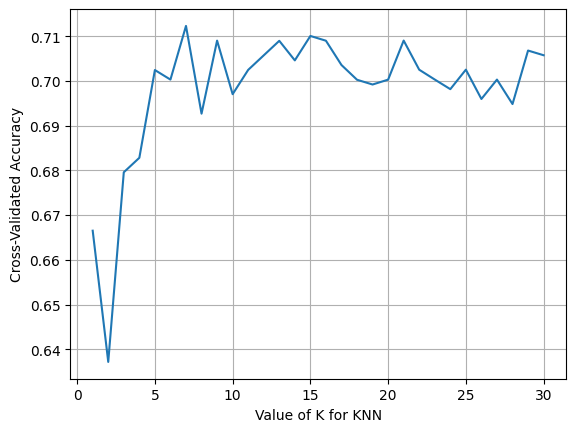

In [51]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

#### Из графика можно сделать вывод, при k=15 наблюдается наибольшее значение score

In [57]:
knn = KNeighborsClassifier(n_neighbors=15)
scores = cross_validate(knn, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])
for i in scores.keys():
    print(i, ' ',scores[i].round(3),'\n')
# print(scores.mean())

fit_time   [0.022 0.002 0.002 0.002 0.001 0.001 0.001 0.001 0.001 0.001] 

score_time   [0.019 0.004 0.005 0.004 0.004 0.004 0.004 0.004 0.004 0.004] 

test_accuracy   [0.632 0.632 0.842 0.789 0.778 0.667 0.833 0.611 0.667 0.722] 

test_recall   [0.818 0.818 0.909 0.727 1.    0.6   0.8   0.727 0.636 0.727] 

test_precision   [0.643 0.643 0.833 0.889 0.714 0.75  0.889 0.667 0.778 0.8  ] 

test_f1   [0.72  0.72  0.87  0.8   0.833 0.667 0.842 0.696 0.7   0.762] 



#### b) Используйте RandomizedSearchCV.

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
%%time
param_grid = {'n_neighbors':list(range(1,30)),
              'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid.fit(X,y)

CPU times: user 2.45 s, sys: 2.43 s, total: 4.88 s
Wall time: 707 ms


RandomizedSearchCV(cv=10, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19, 20,
                                                        21, 22, 23, 24, 25, 26,
                                                        27, 28, 29],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [61]:
print(grid.best_score_)
print(grid.best_estimator_)

0.7231724796942188
KNeighborsClassifier(n_neighbors=9, weights='distance')


In [63]:
knn = KNeighborsClassifier(n_neighbors=9)
scores = cross_validate(knn, X_test, y_test, cv=10, scoring=['accuracy','recall','precision','f1'])
for i in scores.keys():
    print(i, ' ',scores[i].round(3),'\n')

fit_time   [0.013 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.001 0.002] 

score_time   [0.015 0.004 0.004 0.004 0.005 0.006 0.004 0.004 0.004 0.004] 

test_accuracy   [0.579 0.632 0.632 0.789 0.778 0.611 0.778 0.611 0.611 0.722] 

test_recall   [0.727 0.727 0.636 0.818 0.9   0.7   0.8   0.727 0.636 0.818] 

test_precision   [0.615 0.667 0.7   0.818 0.75  0.636 0.8   0.667 0.7   0.75 ] 

test_f1   [0.667 0.696 0.667 0.818 0.818 0.667 0.8   0.696 0.667 0.783] 



### 7. Сформулируйте выводы.

Можно сказать, что оба метода дали примерно одинаковый результат, потому что оба нашли минимум в функции